In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'   #to print multiple outputs 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for splitting
from sklearn.model_selection import train_test_split

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#for normality check
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#for correlation analysis
import seaborn as sns



In [140]:
df=pd.read_csv("03_realestate_dataset.csv",delimiter=";",decimal=",",index_col="No")
df.drop(["X1 transaction date"],axis=1,inplace=True)
df.shape
df.head(5)
df.dtypes

(414, 6)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1


X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [141]:
df.rename(columns={"X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"distance_center",
                  "X4 number of convenience stores":"num_stores",
                  "X5 latitude":"latitude",
                  "X6 longitude":"longitude",
                  "Y house price of unit area":"Price"},inplace=True)
                  

df.describe()

,house_age,distance_center,num_stores,latitude,longitude,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [142]:
# correlation analysis between explanatory variables and target: price variable
df.corr()

,house_age,distance_center,num_stores,latitude,longitude,Price
house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_center,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
num_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

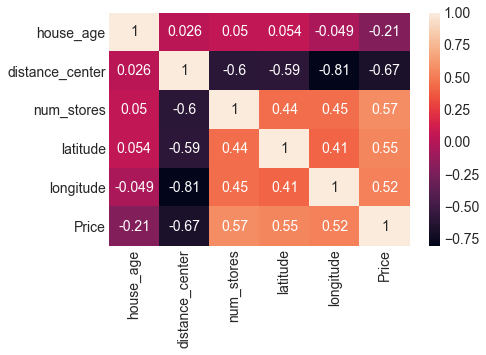

In [143]:

#abs(df.corr()["Price"] )  

#df['distance_center'].corr(df['latitude']) 
#df['distance_center'].corr(df['longitude'])

corr=df.corr()
sns.heatmap(corr,vmax=1,annot=True)# the significant correlation with distance, # stores , latitude and longitude
 # also a significant correlation btw distance and longitude


/Users/Apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

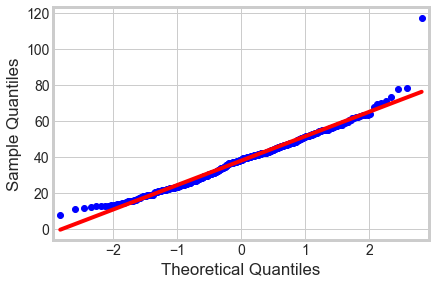

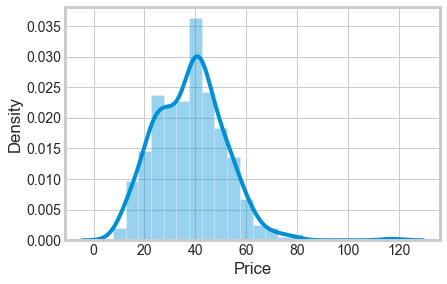

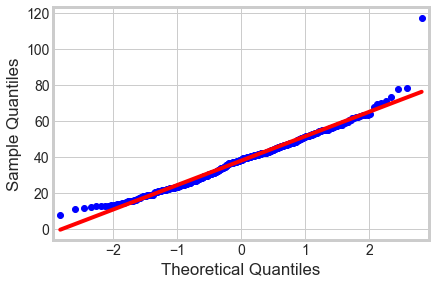

In [144]:
sns.distplot(df['Price']) # from histogram it seems that most of the house prices is distributed around mean value

# q-q plot
qqplot(df["Price"], line='s')
pyplot.show()


Text(0.5, 0, 'House age')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Distance to MRT')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Number of stores')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'House price')

Text(0.5, 1.0, 'Real Estate Valuation')

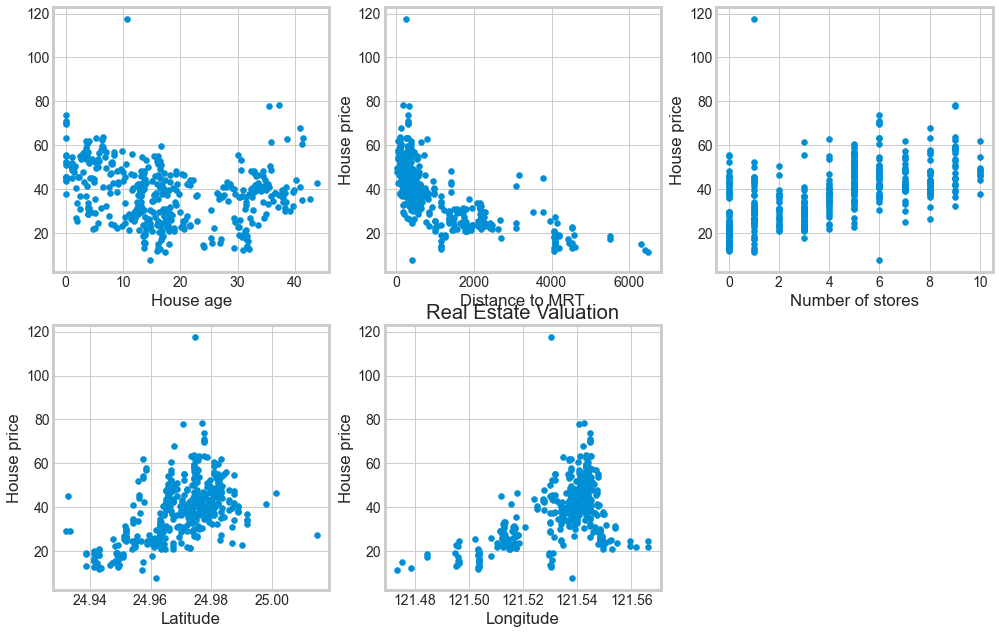

In [145]:
# visualization of relationship btw target variable and indep. variables
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)



ax1.scatter(x=df['house_age'], y=df['Price'])
ax2.scatter(x=df['distance_center'], y=df['Price'])
ax3.scatter(x=df['num_stores'], y=df['Price'])
ax4.scatter(x=df['latitude'], y=df['Price'])
ax5.scatter(x=df['longitude'], y=df['Price'])




ax1.set_xlabel('House age')
ax2.set_ylabel('House price')

ax2.set_xlabel('Distance to MRT')
ax2.set_ylabel('House price')

ax3.set_xlabel('Number of stores')
ax3.set_ylabel('House price')

ax4.set_xlabel('Latitude')
ax4.set_ylabel('House price')

ax5.set_xlabel('Longitude')
ax5.set_ylabel('House price')
plt.title('Real Estate Valuation')
plt.show()

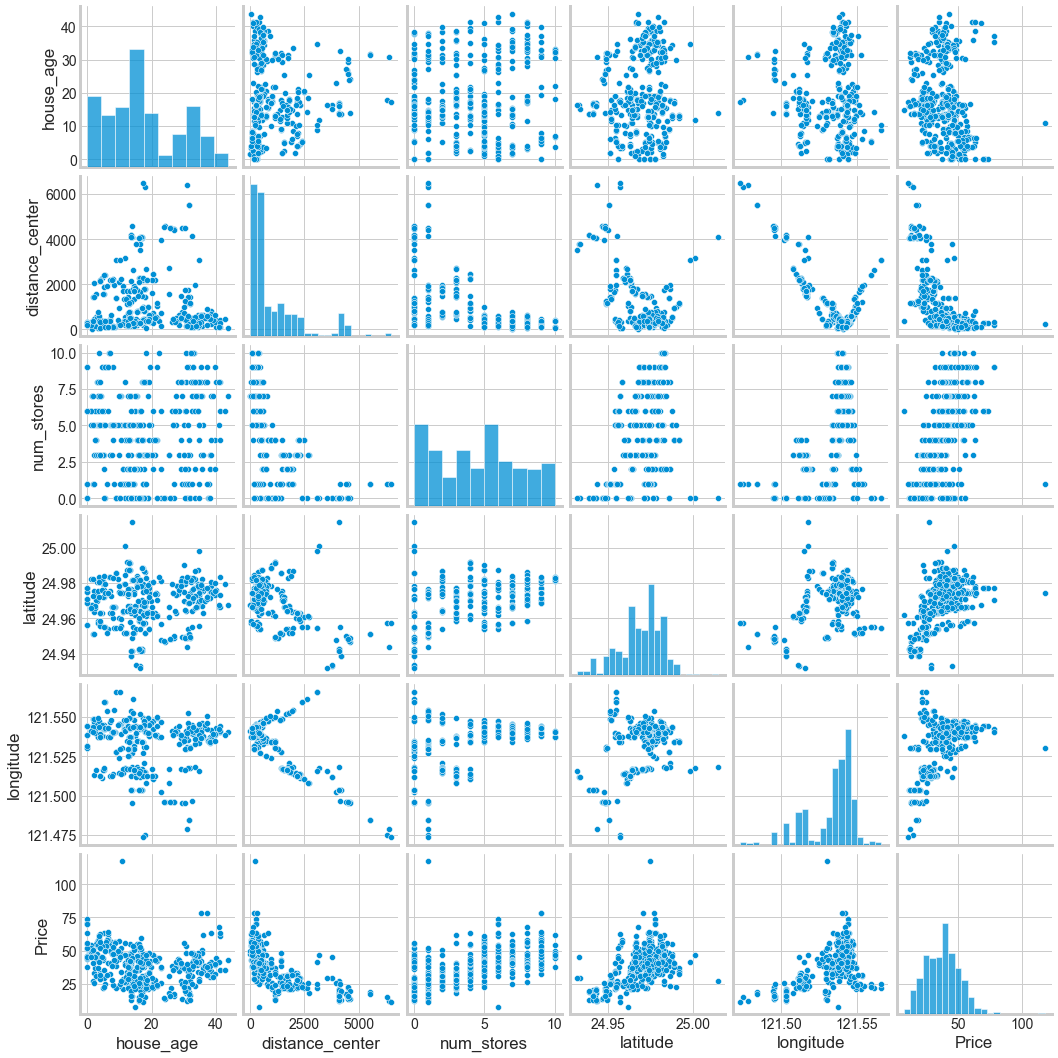

In [146]:
sns.set_style("whitegrid")   #optional plot
#plt.style.use("fivethirtyeight")
sns.pairplot(df)

Text(0.5, 0, 'Latitude in degree')

Text(0, 0.5, 'Longitude in degree')

Text(0.5, 1.0, 'House price vs Coordinates')

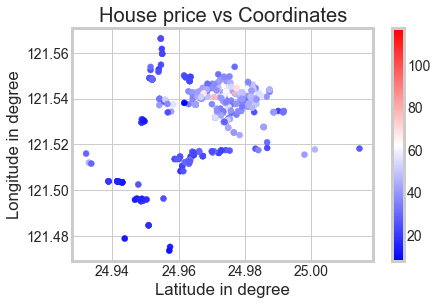

In [147]:
# relationship between coordinates(longitude and latitude) and house price

plt.scatter(x=df['latitude'], y=df['longitude'],c=df['Price'],cmap="bwr")
plt.colorbar()
plt.xlabel('Latitude in degree')
plt.ylabel('Longitude in degree')
plt.title("House price vs Coordinates")




In [148]:
# Training and test split

X = df.drop('Price', axis =1)
#X=df.iloc[:,:-1].values

Y= df['Price']
#Y= df.iloc[:,-1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)


In [149]:

#scaling for the independent variables 



pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [150]:
# k=10 fold cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def evaluate(actual, predicted):
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    return mae, mse, rmse, r_square

def print_evaluate(actual, predicted):  
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    print('Mean absolute error is:', mae)
    print('Mean squared error is:', mse)
    print('Root mean squared error is:', rmse)
    print('R-Square is:', r_square)
    
    


In [152]:
# 1. Application of Linear Regression by scikit-learn

from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train,Y_train)


LinearRegression(normalize=True)

In [154]:
print(lm.coef_)
print(lm.intercept_)

[-2.29524674e-01 -3.23404122e-03  1.27901078e+00  2.45850042e+02
  3.37735443e+01]
-10203.363315775287


In [157]:
lm_coeff= pd.DataFrame(lm.coef_, X.columns, columns=['Linear Regression Coeff.'])
lm_coeff

,Linear Regression Coeff.
house_age,-0.229525
distance_center,-0.003234
num_stores,1.279011
latitude,245.850042
longitude,33.773544


Text(0.5, 0, 'True Values ')

Text(0, 0.5, 'Predictions ')

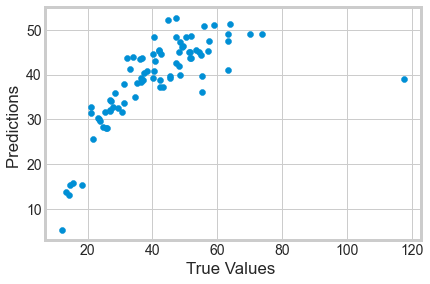

In [162]:
# 1.2. Making the predictions
predictions = lm.predict(X_test)

# visual representations of predictions
plt.scatter(Y_test, predictions)  # not very good predictions!
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

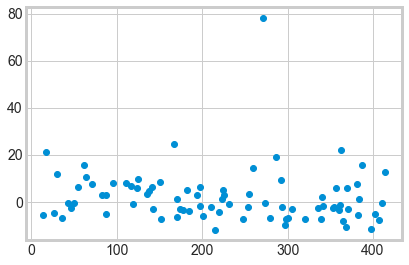

In [160]:
# plotting the differences btw actual and predictions

plt.plot(Y_test - predictions,marker='o',linestyle='')

In [165]:
test_predictions = lm.predict(X_test)
train_predictions = lm.predict(X_train)

print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")

print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)

Performance metrics for test set:

Mean absolute error is: 7.1697675286875455
Mean squared error is: 137.90303469021165
Root mean squared error is: 11.74321228157831
R-Square is: 0.4828316713108233


Performance metrics for training set:

Mean absolute error is: 5.896453283194566
Mean squared error is: 65.5763208848885
Root mean squared error is: 8.097920775414421
R-Square is: 0.5940717442253622


In [173]:
lm_results = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_predictions) , cross_val(LinearRegression())]], 
                          columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', "CV"])
lm_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,5.361267,109.442928,10.461497,0.589564,0.571316


In [174]:
# 2. Application of Random Forest by scikit-learn
from sklearn.ensemble import RandomForestRegressor

In [175]:
random_forest = RandomForestRegressor(n_estimators=500) # try also with n=10000
random_forest.fit(X_train, Y_train)

test_predictions = random_forest.predict(X_test)
train_predictions = random_forest.predict(X_train)

print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")
print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)



random_forest_results = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_predictions), 0]], 
                            columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', 'CV'])


random_forest_results

RandomForestRegressor(n_estimators=500)

Performance metrics for test set:

Mean absolute error is: 5.364812800639781
Mean squared error is: 108.59898044595155
Root mean squared error is: 10.421083458352665
R-Square is: 0.5927286637255716


Performance metrics for training set:

Mean absolute error is: 1.9644220976489037
Mean squared error is: 7.592655428016771
Root mean squared error is: 2.755477350300084
R-Square is: 0.9530002090235757


,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Random Forest Regressor,5.364813,108.59898,10.421083,0.592729,0


In [176]:
# Performance metrics together

perf_metrics = lm_results.append(random_forest_results, ignore_index=True)
perf_metrics

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,5.361267,109.442928,10.461497,0.589564,0.571316
1,Random Forest Regressor,5.364813,108.598980,10.421083,0.592729,0.000000
